# Домашнее задание

Будем прогнозировать количество проданного товара в городе Бангалор (Индия)

## Импорт библиотек и загрузка данных

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt


%matplotlib inline

pd.options.display.float_format = "{:.2f}".format

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (15, 15)

# данные по продажам в Индии в различных городах и штатах
df = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/stepik_applied_tasks/main/datasets/market_arrivals_ind.csv")

In [2]:
df.date = pd.DatetimeIndex(df.date)

# Отсортируем и добавим date в индекс
df = df.sort_values(by="date")
df.index = pd.PeriodIndex(df.date, freq="M")

In [3]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
1996-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON,1996-01-01
1996-02,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON,1996-02-01
1996-03,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON,1996-03-01
1996-04,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON,1996-04-01
1996-05,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON,1996-05-01


Оставим только данные по городу Бангалор

In [4]:
dfBang = df.loc[df.city == "BANGALORE"].copy()

In [5]:
# Удалим лишние столбцы
ts = dfBang.drop(
    ["market", "month", "year", "state", "city", "priceMin", "priceMax", "priceMod", "date"], axis=1
)

In [6]:
ts.head()

,quantity
date,
2004-01,227832
2004-02,225133
2004-03,221952
2004-04,185150
2004-05,137390


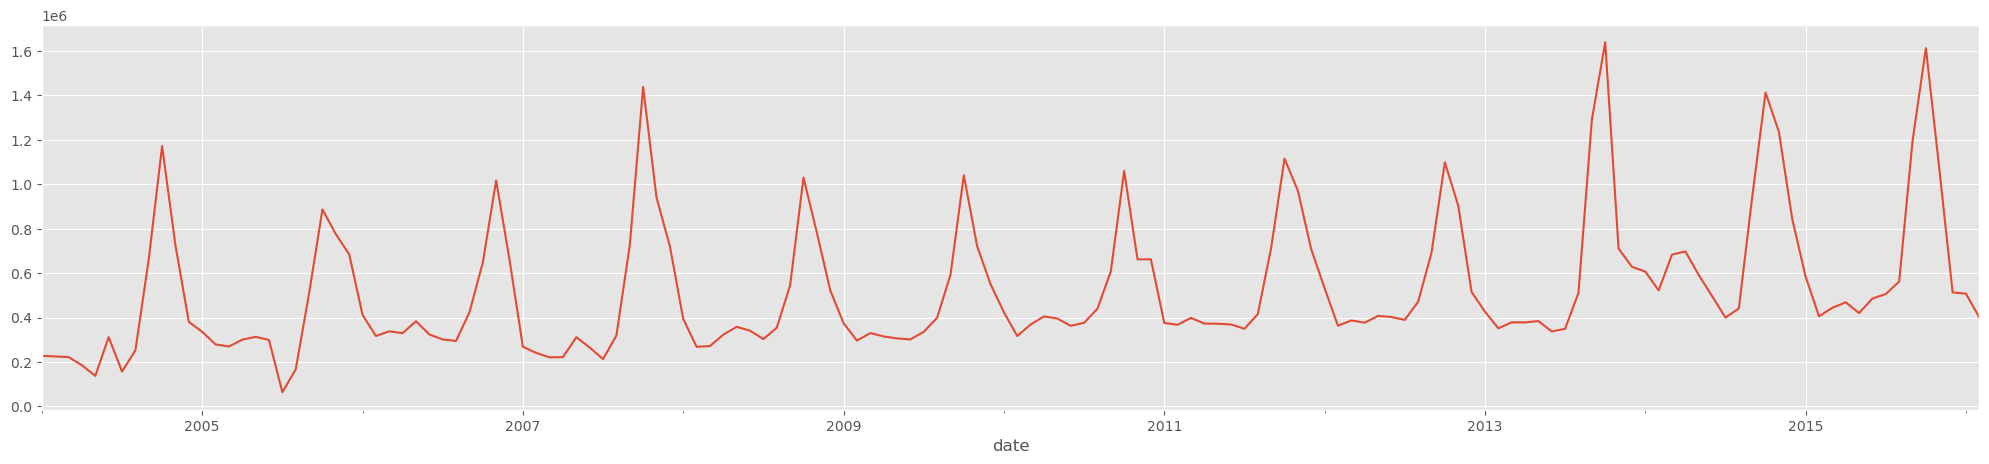

In [7]:
ts.quantity.plot(figsize=(25,5));

## Обучение адаптивных моделей

Разбейте данные (quantity) на train и test.

* train - первые 85% данных

* test - следующие 15% данных

Проверьте, что в тест попало 22 измерения.

In [8]:
ts.shape

(146, 1)

In [9]:
cut_index = int(ts.shape[0] * 0.85)
print(f"index = {cut_index}")

train = ts.iloc[:cut_index]
test = ts.iloc[cut_index:]
print(train.shape)
print(test.shape)

index = 124
(124, 1)
(22, 1)


In [10]:
test.tail()

,quantity
date,
2015-10,1612160
2015-11,1071872
2015-12,513186
2016-01,507223
2016-02,400359


Обучите следующие модели на тренировочных данных и сделайте прогноз на 22 шага вперед (величина тестовых данных), нарисуйте прогнозы:

1) Простое экспоненциальное сглаживание с автоматически подбираемым $\alpha$

2) Модель Хольта (аддитивную) с автоматическим подбором гиперпараметров

3) Аддитивную модель Хольта с автоматическим подбором гиперпараметров и затухающим трендом

In [16]:
# simple exponensial smoothing

simple_fit = SimpleExpSmoothing(train, initialization_method="heuristic").fit()
simple_forecast = simple_fit.forecast(len(test))
simple_forecast

/home/andrey/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2014-05   697348.05
2014-06   697348.05
2014-07   697348.05
2014-08   697348.05
2014-09   697348.05
2014-10   697348.05
2014-11   697348.05
2014-12   697348.05
2015-01   697348.05
2015-02   697348.05
2015-03   697348.05
2015-04   697348.05
2015-05   697348.05
2015-06   697348.05
2015-07   697348.05
2015-08   697348.05
2015-09   697348.05
2015-10   697348.05
2015-11   697348.05
2015-12   697348.05
2016-01   697348.05
2016-02   697348.05
Freq: M, dtype: float64

In [21]:
simple_fit.params

{'smoothing_level': 0.995,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': -38009.73333333328,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

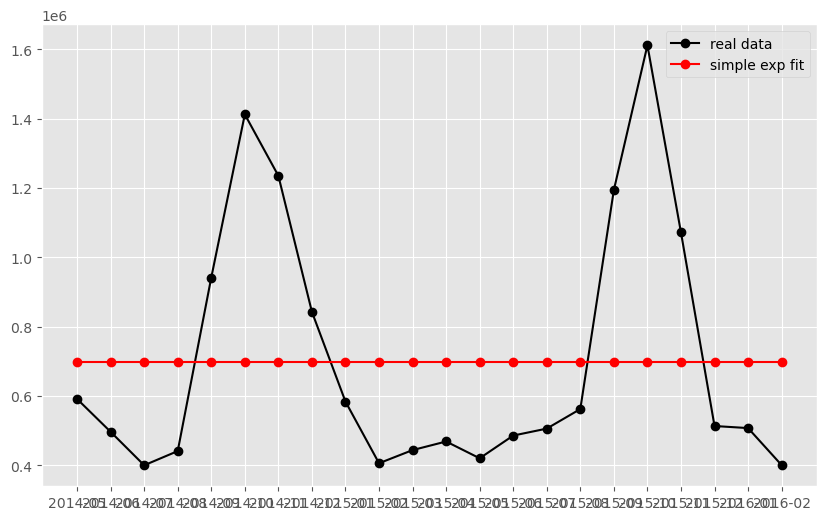

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(pd.Series(test['quantity'], index=test['quantity'].index.astype(str)), 
         marker='o', color='black', label='real data')
plt.plot(pd.Series(simple_forecast.values, index=simple_forecast.index.astype(str)), 
         marker='o', color='red', label='simple exp fit')
plt.legend()
plt.show()

In [59]:
# holt simple

holt_fit = Holt(train, initialization_method='estimated').fit()
holt_forecast = holt_fit.forecast(len(test))
holt_forecast

/home/andrey/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2014-05   705189.23
2014-06   712992.16
2014-07   720795.09
2014-08   728598.02
2014-09   736400.96
2014-10   744203.89
2014-11   752006.82
2014-12   759809.75
2015-01   767612.68
2015-02   775415.62
2015-03   783218.55
2015-04   791021.48
2015-05   798824.41
2015-06   806627.34
2015-07   814430.27
2015-08   822233.21
2015-09   830036.14
2015-10   837839.07
2015-11   845642.00
2015-12   853444.93
2016-01   861247.87
2016-02   869050.80
Freq: M, dtype: float64

In [62]:
holt_fit.params

{'smoothing_level': 0.995,
 'smoothing_trend': 0.02369047619047619,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': -38009.73333333328,
 'initial_trend': 71495.15151515152,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

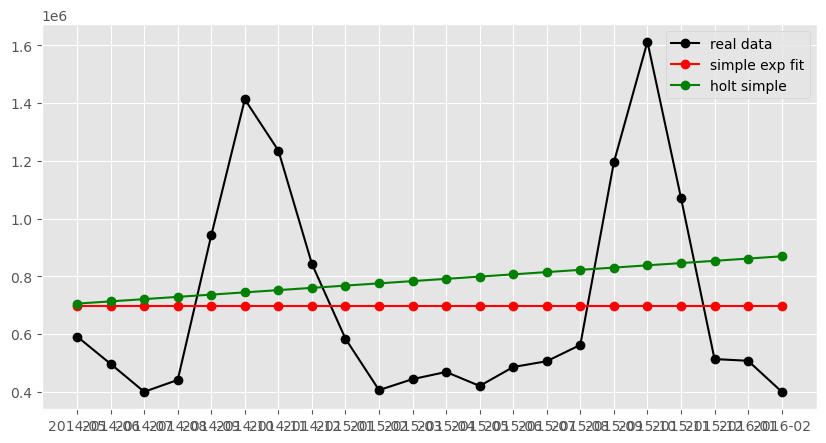

In [68]:
plt.figure(figsize=(10, 5))
plt.plot(pd.Series(test['quantity'], index=test['quantity'].index.astype(str)), 
         marker='o', color='black', label='real data')
plt.plot(pd.Series(simple_forecast.values, index=simple_forecast.index.astype(str)), 
         marker='o', color='red', label='simple exp fit')
plt.plot(pd.Series(holt_forecast.values, index=holt_forecast.index.astype(str)), 
         marker='o', color='green', label='holt simple')
plt.legend()
plt.show()

In [74]:
# holt dumped trend

holt_dl_fit = Holt(train, damped_trend=True, initialization_method='estimated').fit()
holt_dl_forecast = holt_dl_fit.forecast(len(test))
holt_dl_forecast

/home/andrey/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2014-05    717588.16
2014-06    737524.67
2014-07    757261.82
2014-08    776801.59
2014-09    796145.97
2014-10    815296.90
2014-11    834256.33
2014-12    853026.16
2015-01    871608.29
2015-02    890004.60
2015-03    908216.94
2015-04    926247.17
2015-05    944097.09
2015-06    961768.51
2015-07    979263.22
2015-08    996582.98
2015-09   1013729.54
2015-10   1030704.64
2015-11   1047509.98
2015-12   1064147.28
2016-01   1080618.20
2016-02   1096924.41
Freq: M, dtype: float64

In [75]:
holt_dl_fit.params_formatted

,name,param,optimized
smoothing_level,alpha,0.99,True
smoothing_trend,beta,0.00,True
initial_level,l.0,-38009.73,True
initial_trend,b.0,70780.20,True
damping_trend,phi,0.99,True


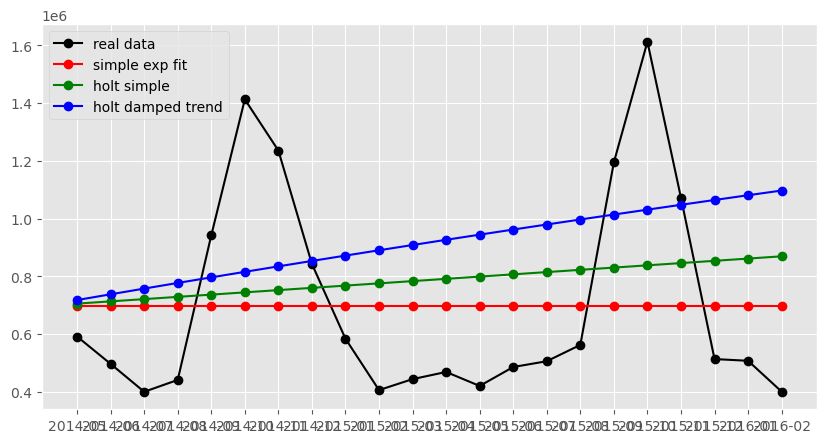

In [94]:
plt.figure(figsize=(10, 5))
plt.plot(pd.Series(test['quantity'], index=test['quantity'].index.astype(str)), 
         marker='o', color='black', label='real data')
plt.plot(pd.Series(simple_forecast.values, index=simple_forecast.index.astype(str)), 
         marker='o', color='red', label='simple exp fit')
plt.plot(pd.Series(holt_forecast.values, index=holt_forecast.index.astype(str)), 
         marker='o', color='green', label='holt simple')
plt.plot(pd.Series(holt_dl_forecast.values, index=holt_dl_forecast.index.astype(str)), 
         marker='o', color='blue', label='holt damped trend')
plt.legend()
plt.show()

In [88]:
from sklearn.metrics import r2_score

print("r2 simple       = %.4f" % r2_score(test['quantity'], simple_forecast.values))
print("r2 holt         = %.4f" % r2_score(test['quantity'], holt_forecast.values))
print("r2 holt with dl = %.4f" % r2_score(test['quantity'], holt_dl_forecast.values))

r2 simple       = -0.0006
r2 holt         = -0.0554
r2 holt with dl = -0.3983


## Quiz

У какой из трех обученных моделей самый быстро возрастающий тренд?

Обучите четыре модели Хольта-Винтерса на тренировочных данных и сделайте прогноз на 22 шага вперед (величина тестовых данных), нарисуйте прогнозы:

1) Модель с аддитивными трендом и сезонностью

2) Модель с аддитивным трендом и мультипликативной сезонностью

3) Модель с аддитивными трендом и сезонностью и затухающим трендом

4) Модель с аддитивным трендом и мультипликативной сезонностью и затухающим трендом

In [105]:
fit1 = ExponentialSmoothing(
    train,
    trend="add",
    seasonal="add",
    initialization_method="estimated",
    use_boxcox=True
).fit()
fit1_forecast = fit1.forecast(len(test))

fit2 = ExponentialSmoothing(
    train,
    trend="add",
    seasonal="mul",
    initialization_method="estimated",
    use_boxcox=True
).fit()
fit2_forecast = fit2.forecast(len(test))

fit3 = ExponentialSmoothing(
    train,
    trend="add",
    seasonal="add",
    damped_trend=True,
    initialization_method="estimated",
    use_boxcox=True
).fit()
fit3_forecast = fit3.forecast(len(test))

fit4 = ExponentialSmoothing(
    train,
    trend="add",
    seasonal="mul",
    damped_trend=True,
    initialization_method="estimated",
    use_boxcox=True
).fit()
fit4_forecast = fit4.forecast(len(test))

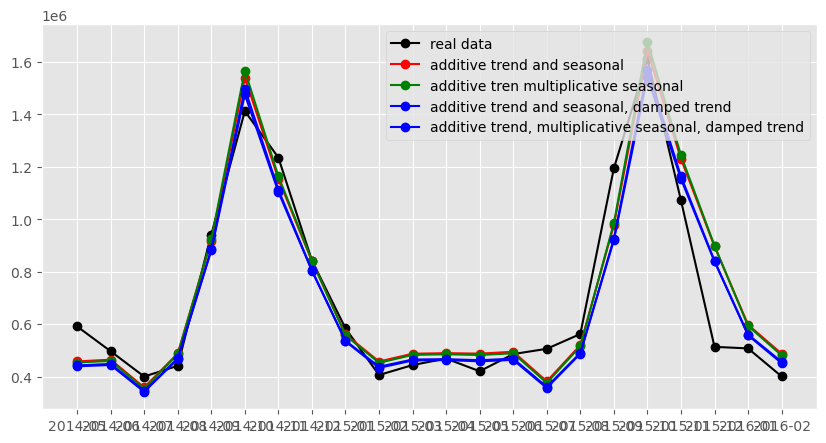

In [106]:
plt.figure(figsize=(10, 5))

plt.plot(pd.Series(test['quantity'], index=test['quantity'].index.astype(str)), 
         marker='o', color='black', label='real data')
plt.plot(pd.Series(fit1_forecast.values, index=fit1_forecast.index.astype(str)), 
         marker='o', color='red', label='additive trend and seasonal')
plt.plot(pd.Series(fit2_forecast.values, index=fit2_forecast.index.astype(str)), 
         marker='o', color='green', label='additive tren multiplicative seasonal')
plt.plot(pd.Series(fit3_forecast.values, index=fit3_forecast.index.astype(str)), 
         marker='o', color='blue', label='additive trend and seasonal, damped trend')
plt.plot(pd.Series(fit4_forecast.values, index=fit4_forecast.index.astype(str)), 
         marker='o', color='blue', label='additive trend, multiplicative seasonal, damped trend')

plt.legend()
plt.show()

Вычислите RMSE (корень из среднеквадратичной ошибки) на тестовых данных для каждого из четырех прогнозов.

In [ ]:
from sklearn.metrics import mean_squared_error

print("RMSE fit1 = %.4f" % np.sqrt(mean_squared_error(test['quantity'], fit1_forecast.values)))
print("RMSE fit2 = %.4f" % np.sqrt(mean_squared_error(test['quantity'], fit2_forecast.values)))
print("RMSE fit3 = %.4f" % np.sqrt(mean_squared_error(test['quantity'], fit3_forecast.values)))
print("RMSE fit4 = %.4f" % np.sqrt(mean_squared_error(test['quantity'], fit4_forecast.values)))

## Quiz

Какая модель справилась лучше остальных?

## Quiz

Чему равно значение RMSE для лучшей модели? Ответ округлите до целого числа.

В предыдущем домашнем задании мы работали с логарифмированным рядом и вычисляли RMSE для него.

Вычислите ошибки последних четырех моделей для логарифмов правильных ответов и прогнозов.

In [108]:
print("RMSE fit1 = %.4f" % np.sqrt(mean_squared_error(test['quantity'], fit1_forecast.values)))
print("RMSE fit2 = %.4f" % np.sqrt(mean_squared_error(test['quantity'], fit2_forecast.values)))
print("RMSE fit3 = %.4f" % np.sqrt(mean_squared_error(test['quantity'], fit3_forecast.values)))
print("RMSE fit4 = %.4f" % np.sqrt(mean_squared_error(test['quantity'], fit4_forecast.values)))

RMSE fit1 = 118556.8251
RMSE fit2 = 120856.2991
RMSE fit3 = 113916.0294
RMSE fit4 = 113897.7027


## Quiz

Какое семейство моделей лучше справилось с решением задачи:
SARIMAX или модели Хольта-Винтерса?

In [109]:
from statsmodels.tsa.api import SARIMAX

In [110]:
fit5 = SARIMAX(train,).fit()
fit5_forecast = fit5.forecast(len(test))
fit5_forecast

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.37624D+01    |proj g|=  2.46320D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      6      1     0     0   5.446D-07   1.376D+01
  F =   13.762258799084744     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


2014-05   637349.79
2014-06   582451.05
2014-07   532281.06
2014-08   486432.51
2014-09   444533.18
2014-10   406242.88
2014-11   371250.76
2014-12   339272.71
2015-01   310049.13
2015-02   283342.74
2015-03   258936.74
2015-04   236632.97
2015-05   216250.36
2015-06   197623.43
2015-07   180600.94
2015-08   165044.70
2015-09   150828.42
2015-10   137836.67
2015-11   125963.97
2015-12   115113.94
2016-01   105198.49
2016-02    96137.12
Freq: M, Name: predicted_mean, dtype: float64

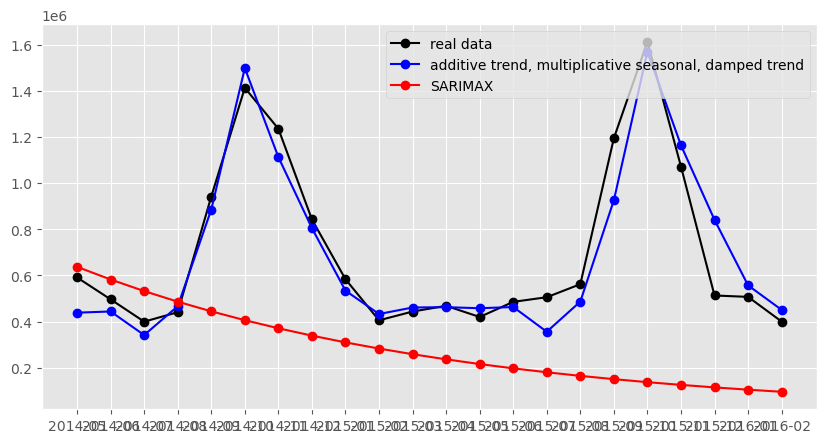

In [111]:
plt.figure(figsize=(10, 5))

plt.plot(pd.Series(test['quantity'], index=test['quantity'].index.astype(str)), 
         marker='o', color='black', label='real data')
plt.plot(pd.Series(fit4_forecast.values, index=fit4_forecast.index.astype(str)), 
         marker='o', color='blue', label='additive trend, multiplicative seasonal, damped trend')
plt.plot(pd.Series(fit5_forecast.values, index=fit5_forecast.index.astype(str)), 
         marker='o', color='red', label='SARIMAX')

plt.legend()
plt.show()

## Опциональное задание (без проверки)

Воспользуйтесь экспоненциальными моделями из библиотеки Orbit для получения прогноза в данной задаче.

In [ ]:
# ваш код здесь